<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Credit-Card-Default-Prediction/blob/main/Team_Final_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [117]:
#Importing lbrary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [118]:
data='https://github.com/Aaryant31/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true'


In [119]:
pd.read_excel(data)

Unnamed: 0         X1  ...       X23                           Y
0             ID  LIMIT_BAL  ...  PAY_AMT6  default payment next month
1              1      20000  ...         0                           1
2              2     120000  ...      2000                           1
3              3      90000  ...      5000                           0
4              4      50000  ...      1000                           0
...          ...        ...  ...       ...                         ...
29996      29996     220000  ...      1000                           0
29997      29997     150000  ...         0                           0
29998      29998      30000  ...      3100                           1
29999      29999      80000  ...      1804                           1
30000      30000      50000  ...      1000                           1

[30001 rows x 25 columns]

In [120]:
#reading data
df=pd.read_excel(data,header=1)

# Data inspection

In [121]:
df.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0   1      20000    2  ...         0         0                           1
1   2     120000    2  ...         0      2000                           1
2   3      90000    2  ...      1000      5000                           0
3   4      50000    2  ...      1069      1000                           0
4   5      50000    1  ...       689       679                           0

[5 rows x 25 columns]

In [122]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [123]:
#checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No null value found**

In [124]:
#describing data
df.describe().transpose()

count           mean  ...        75%        max
ID                          30000.0   15000.500000  ...   22500.25    30000.0
LIMIT_BAL                   30000.0  167484.322667  ...  240000.00  1000000.0
SEX                         30000.0       1.603733  ...       2.00        2.0
EDUCATION                   30000.0       1.853133  ...       2.00        6.0
MARRIAGE                    30000.0       1.551867  ...       2.00        3.0
AGE                         30000.0      35.485500  ...      41.00       79.0
PAY_0                       30000.0      -0.016700  ...       0.00        8.0
PAY_2                       30000.0      -0.133767  ...       0.00        8.0
PAY_3                       30000.0      -0.166200  ...       0.00        8.0
PAY_4                       30000.0      -0.220667  ...       0.00        8.0
PAY_5                       30000.0      -0.266200  ...       0.00        8.0
PAY_6                       30000.0      -0.291100  ...       0.00        8.0
BILL_AMT1                   30000.0   51223.330900  ...   67091.00   964511.0
BILL_AMT2                   30000.0   49179.075167  ...   64006.25   983931.0
BILL_AMT3                   30000.0   47013.154800  ...   60164.75  1664089.0
BILL_AMT4                   30000.0   43262.948967  ...   54506.00   891586.0
BILL_AMT5                   30000.0   40311.400967  ...   50190.50   927171.0
BILL_AMT6                   30000.0   38871.760400  ...   49198.25   961664.0
PAY_AMT1                    30000.0    5663.580500  ...    5006.00   873552.0
PAY_AMT2                    30000.0    5921.163500  ...    5000.00  1684259.0
PAY_AMT3                    30000.0    5225.681500  ...    4505.00   896040.0
PAY_AMT4                    30000.0    4826.076867  ...    4013.25   621000.0
PAY_AMT5                    30000.0    4799.387633  ...    4031.50   426529.0
PAY_AMT6                    30000.0    5215.502567  ...    4000.00   528666.0
default payment next month  30000.0       0.221200  ...       0.00        1.0

[25 rows x 8 columns]

In [125]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [126]:
#droping Id Column since its is unique for every row
df=df.drop('ID',axis=1)

In [127]:
#viewing Data

df.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT5  PAY_AMT6  default payment next month
0      20000    2          2  ...         0         0                           1
1     120000    2          2  ...         0      2000                           1
2      90000    2          2  ...      1000      5000                           0
3      50000    2          2  ...      1069      1000                           0
4      50000    1          2  ...       689       679                           0

[5 rows x 24 columns]

# Data cleaning

In [128]:
df['LIMIT_BAL'].max()

1000000

In [129]:
df['LIMIT_BAL'].min()

10000

In [130]:
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [131]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [132]:
df.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_MAY  PAY_AMT_APR  Defaulters
0      20000    2          2  ...            0            0           1
1     120000    2          2  ...            0         2000           1
2      90000    2          2  ...         1000         5000           0
3      50000    2          2  ...         1069         1000           0
4      50000    1          2  ...          689          679           0

[5 rows x 24 columns]

### Looking for Outlier Using Isolation Forest

In [133]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#creating instance of minmaxscaler
minmax = MinMaxScaler(feature_range=(0, 1))
scale_df = minmax.fit_transform(df.drop('Defaulters',axis=1))

In [134]:
#imprting IsolationForeest for outlier detection
from sklearn.ensemble import IsolationForest

In [135]:
#creating instance of isolation forest
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(scale_df)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(scale_df)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(scale_df)

In [136]:
df.head()

LIMIT_BAL  SEX  ...  multivariate_anomaly_score  multivariate_outlier
0      20000    2  ...                    0.193236                     1
1     120000    2  ...                    0.214444                     1
2      90000    2  ...                    0.272661                     1
3      50000    2  ...                    0.265480                     1
4      50000    1  ...                    0.175220                     1

[5 rows x 26 columns]

In [137]:
#looking the outlier
df[(df['multivariate_outlier'] == -1)]

LIMIT_BAL  SEX  ...  multivariate_anomaly_score  multivariate_outlier
6         500000    1  ...                   -0.047298                    -1
59        400000    2  ...                   -0.018764                    -1
102       480000    1  ...                   -0.075574                    -1
214       470000    1  ...                   -0.025251                    -1
360       500000    2  ...                   -0.073183                    -1
...          ...  ...  ...                         ...                   ...
29605     500000    1  ...                   -0.042915                    -1
29820     400000    1  ...                   -0.053828                    -1
29837     500000    1  ...                   -0.029139                    -1
29883     420000    1  ...                   -0.026219                    -1
29963     610000    1  ...                   -0.134108                    -1

[300 rows x 26 columns]

In [138]:
#removing Outliers
df=df.drop( df[ df['multivariate_outlier'] == -1 ].index)

In [139]:
#checking the shape of df after removing outlier
df.shape

(29700, 26)

# Exploratory Data Analysis and feature Engineering

In [140]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23152
1     6548
Name: Defaulters, dtype: int64

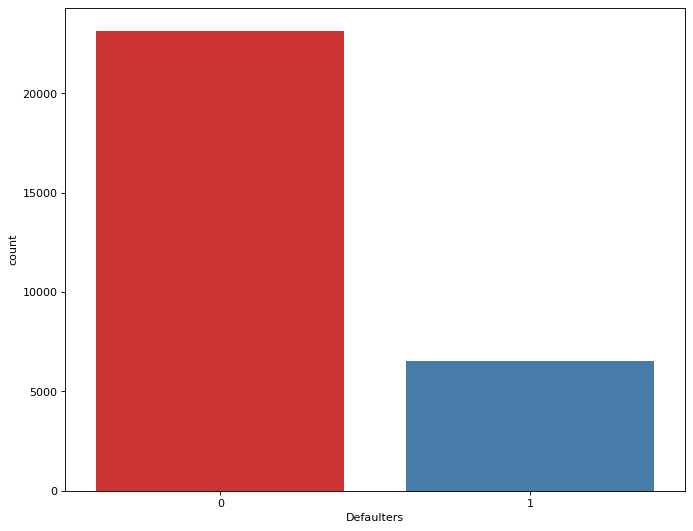

In [141]:
#visualizing dependent variable
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')

**We can see that we have quite imbalance dataset**

## Bivariate Analysis

In [142]:
#analysing categorical variable
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [143]:
#creating different df for categorical variable
df_cat = df[categorical_features]


In [144]:
#checking shape of categorical variable
df_cat.shape

(29700, 3)

In [145]:
#looking into categorical df
df_cat.head()

SEX  EDUCATION  MARRIAGE
0    2          2         1
1    2          2         2
2    2          2         2
3    2          2         1
4    1          2         1

In [146]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    17960
1    11740
Name: SEX, dtype: int64

count of EDUCATION features

2    13921
1    10437
3     4886
5      271
4      123
6       48
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15837
1    13487
3      322
0       54
Name: MARRIAGE, dtype: int64



In [147]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [148]:
df_cat.head()

SEX   EDUCATION MARRIAGE
0  Female  university  married
1  Female  university   single
2  Female  university   single
3  Female  university  married
4    Male  university  married

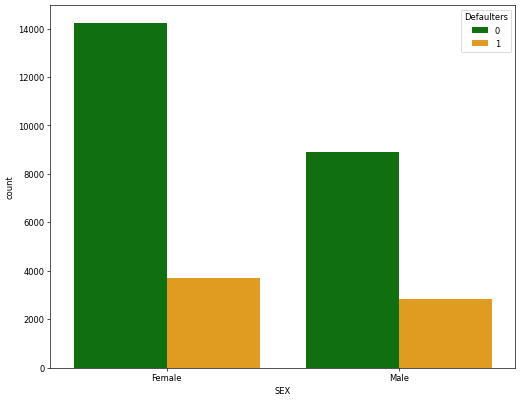

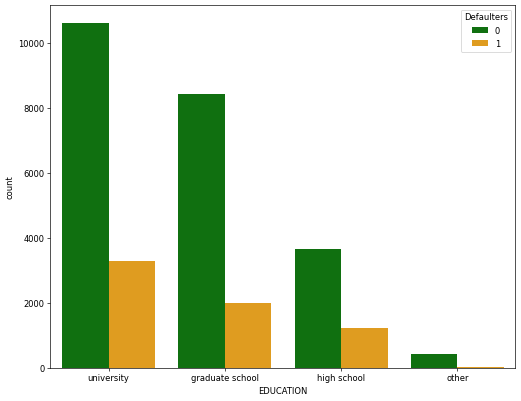

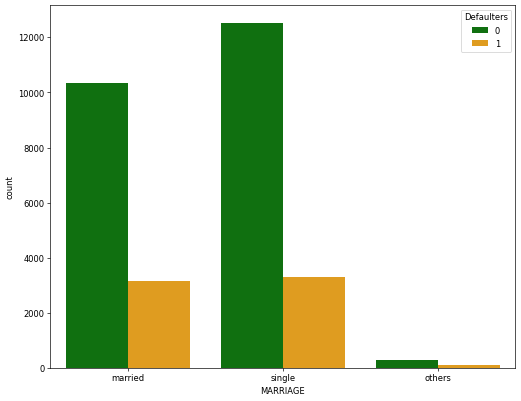

In [149]:
#ploting count plot of  categorical df
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette=["green",'orange'])
  plt.show()

In [150]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    17960
Male      11740
Name: SEX, dtype: int64

count of EDUCATION features

university         13921
graduate school    10437
high school         4886
other                456
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15837
married    13487
others       376
Name: MARRIAGE, dtype: int64



In [151]:
#creating defaulter variable on df_cat
df_cat['Defaulter'] = df['Defaulters']

In [152]:
df_cat.head()

SEX   EDUCATION MARRIAGE  Defaulter
0  Female  university  married          1
1  Female  university   single          1
2  Female  university   single          0
3  Female  university  married          0
4    Male  university  married          0

In [153]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.207071
1    Male   0.240971
         EDUCATION  Defaulter
0  graduate school   0.191722
1      high school   0.251535
2            other   0.070175
3       university   0.236046
  MARRIAGE  Defaulter
0  married   0.233929
1   others   0.236702
2   single   0.208625


### observation
for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

In [154]:
#desribing age variable
df['AGE'].describe()

count    29700.000000
mean        35.435892
std          9.199220
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

### observation
- we can see here min age is 21 and maximum age is 79 in our dataset

In [155]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [156]:
#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

In [157]:
df.head()

LIMIT_BAL  SEX  ...  multivariate_outlier  age_group
0      20000    2  ...                     1      21-30
1     120000    2  ...                     1      21-30
2      90000    2  ...                     1      31-40
3      50000    2  ...                     1      31-40
4      50000    1  ...                     1      51-60

[5 rows x 27 columns]

In [158]:
#cheacking the count of age_group
df['age_group'].value_counts().sort_values(ascending=False)

21-30         10963
31-40         10604
41-50          5909
51-60          1966
60 & above      258
Name: age_group, dtype: int64

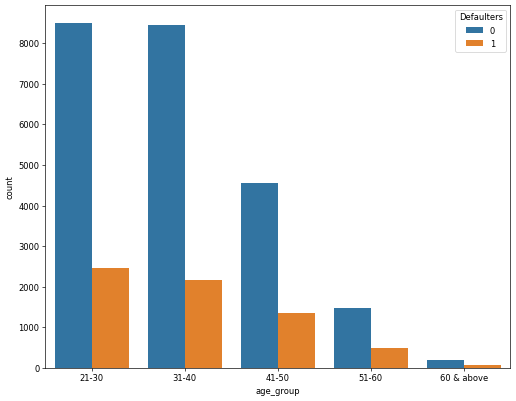

In [159]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters')

### obsevation:
- In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.


In [160]:
#checking the dedfault ratio of age_group
df[['Defaulters','age_group']].groupby('age_group').mean().reset_index()

age_group  Defaulters
0       21-30    0.224209
1       31-40    0.203697
2       41-50    0.230496
3       51-60    0.252798
4  60 & above    0.275194

### observation
- we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.

In [161]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

In [162]:
df.head()

LIMIT_BAL  SEX  ...  multivariate_outlier  age_group
0      20000    2  ...                     1      21-30
1     120000    2  ...                     1      21-30
2      90000    2  ...                     1      31-40
3      50000    2  ...                     1      31-40
4      50000    1  ...                     1      51-60

[5 rows x 26 columns]

In [163]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

PAY_SEPT       PAY_AUG  ...       PAY_MAY       PAY_APR
count  29700.000000  29700.000000  ...  29700.000000  29700.000000
mean      -0.023030     -0.140337  ...     -0.271414     -0.296397
std        1.113999      1.189467  ...      1.132032      1.149251
min       -2.000000     -2.000000  ...     -2.000000     -2.000000
25%       -1.000000     -1.000000  ...     -1.000000     -1.000000
50%        0.000000      0.000000  ...      0.000000      0.000000
75%        0.000000      0.000000  ...      0.000000      0.000000
max        8.000000      8.000000  ...      8.000000      8.000000

[8 rows x 6 columns]

In [164]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

PAY_AMT_SEPT   PAY_AMT_AUG  ...    PAY_AMT_MAY    PAY_AMT_APR
count   29700.000000  2.970000e+04  ...   29700.000000   29700.000000
mean     5359.661818  5.408550e+03  ...    4553.933872    4823.623670
std     14282.084238  1.620293e+04  ...   14114.856319   15656.614427
min         0.000000  0.000000e+00  ...       0.000000       0.000000
25%       990.000000  8.150000e+02  ...     237.750000     100.000000
50%      2100.000000  2.000000e+03  ...    1500.000000    1500.000000
75%      5000.000000  5.000000e+03  ...    4000.000000    4000.000000
max    505000.000000  1.024516e+06  ...  426529.000000  528666.000000

[8 rows x 6 columns]

In [165]:
# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

BILL_AMT_SEPT   BILL_AMT_AUG  ...   BILL_AMT_MAY   BILL_AMT_APR
count   29700.000000   29700.000000  ...   29700.000000   29700.000000
mean    48175.440943   46158.394949  ...   37495.571347   36253.206431
std     65622.377293   62924.272430  ...   52710.101639   52060.625452
min   -165580.000000  -69777.000000  ...  -81334.000000 -339603.000000
25%      3458.750000    2899.000000  ...    1699.750000    1200.000000
50%     21708.500000   20650.000000  ...   17860.000000   16699.000000
75%     64829.000000   61729.750000  ...   49123.750000   48276.500000
max    746814.000000  512650.000000  ...  514114.000000  499100.000000

[8 rows x 6 columns]

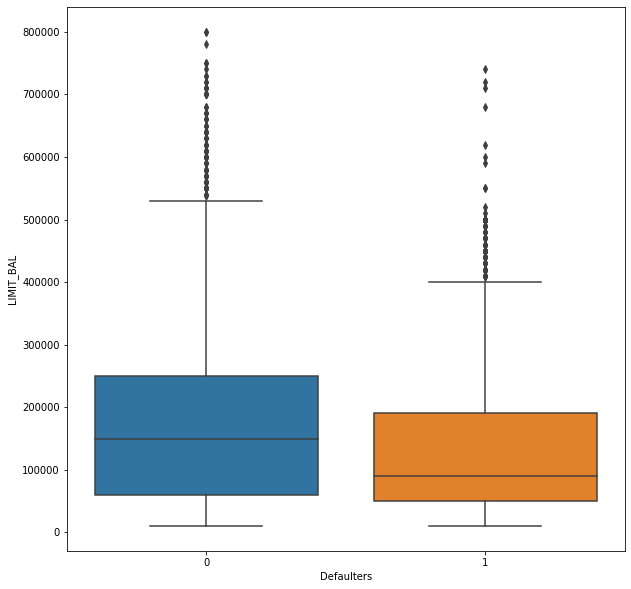

In [166]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulters", y="LIMIT_BAL", data=df)

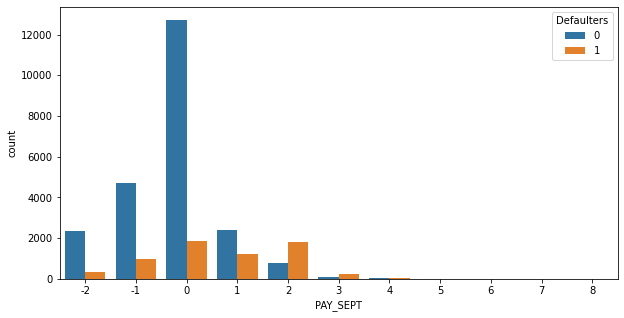

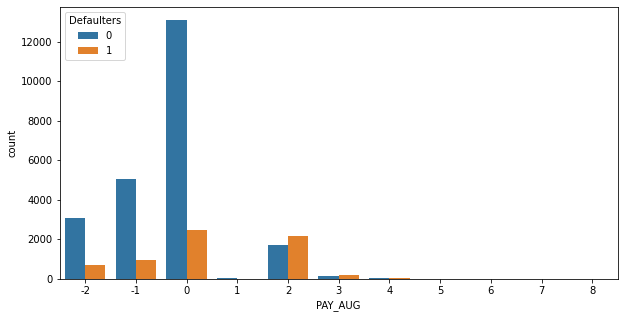

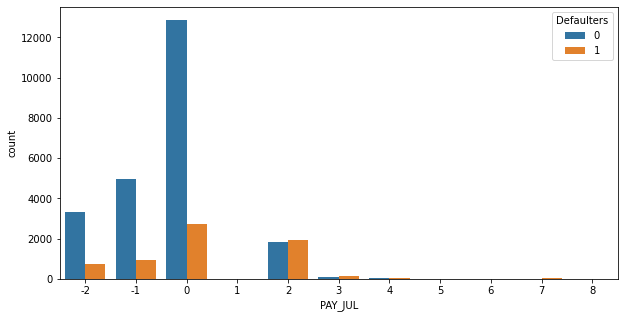

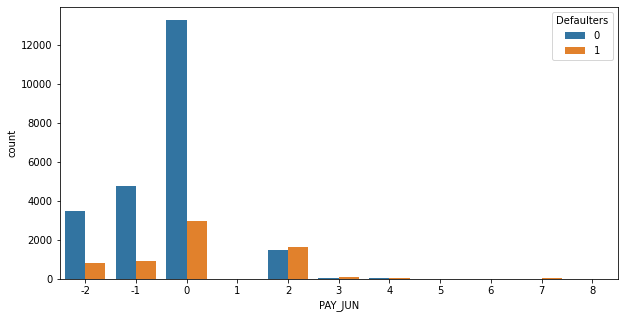

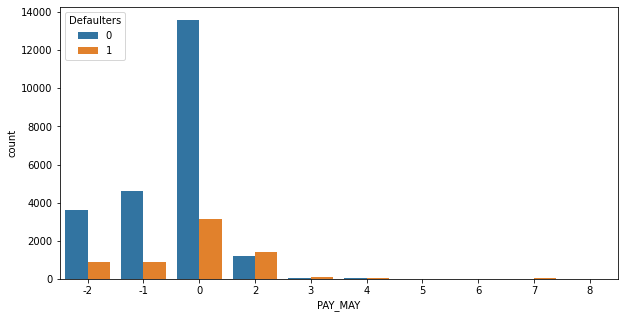

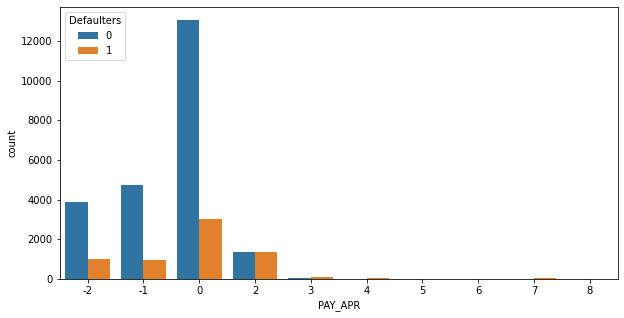

In [167]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

# 

In [168]:
# checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29700 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29700 non-null  int64  
 1   SEX                         29700 non-null  int64  
 2   EDUCATION                   29700 non-null  int64  
 3   MARRIAGE                    29700 non-null  int64  
 4   PAY_SEPT                    29700 non-null  int64  
 5   PAY_AUG                     29700 non-null  int64  
 6   PAY_JUL                     29700 non-null  int64  
 7   PAY_JUN                     29700 non-null  int64  
 8   PAY_MAY                     29700 non-null  int64  
 9   PAY_APR                     29700 non-null  int64  
 10  BILL_AMT_SEPT               29700 non-null  int64  
 11  BILL_AMT_AUG                29700 non-null  int64  
 12  BILL_AMT_JUL                29700 non-null  int64  
 13  BILL_AMT_JUN                297

## Using SMOTE(Synthetic Minority Oversampling Technique) to remediate Imbalance in dependent column

In [169]:
#spliting independent Variable
X=df.drop(['Defaulters','multivariate_anomaly_score','multivariate_outlier'],axis=1)

In [170]:
#looking into independent variable
X.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_MAY  PAY_AMT_APR  age_group
0      20000    2          2  ...            0            0      21-30
1     120000    2          2  ...            0         2000      21-30
2      90000    2          2  ...         1000         5000      31-40
3      50000    2          2  ...         1069         1000      31-40
4      50000    1          2  ...          689          679      51-60

[5 rows x 23 columns]

In [171]:
#maping numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [172]:
X.head()

LIMIT_BAL     SEX   EDUCATION  ... PAY_AMT_MAY  PAY_AMT_APR  age_group
0      20000  Female  university  ...           0            0      21-30
1     120000  Female  university  ...           0         2000      21-30
2      90000  Female  university  ...        1000         5000      31-40
3      50000  Female  university  ...        1069         1000      31-40
4      50000    Male  university  ...         689          679      51-60

[5 rows x 23 columns]

In [173]:
# one hot encoding for age group
X=pd.get_dummies(X)

In [174]:
X.head()

LIMIT_BAL  PAY_SEPT  ...  age_group_51-60  age_group_60 & above
0      20000         2  ...                0                     0
1     120000        -1  ...                0                     0
2      90000         0  ...                0                     0
3      50000         0  ...                0                     0
4      50000        -1  ...                1                     0

[5 rows x 33 columns]

In [175]:
#spliting Dependent variable
y=df['Defaulters']

In [176]:
df_final=X.copy()

In [177]:
df_final.head()

LIMIT_BAL  PAY_SEPT  ...  age_group_51-60  age_group_60 & above
0      20000         2  ...                0                     0
1     120000        -1  ...                0                     0
2      90000         0  ...                0                     0
3      50000         0  ...                0                     0
4      50000        -1  ...                1                     0

[5 rows x 33 columns]

In [178]:
df_final['Defaulters']=df['Defaulters']

In [179]:
df_final

LIMIT_BAL  PAY_SEPT  ...  age_group_60 & above  Defaulters
0          20000         2  ...                     0           1
1         120000        -1  ...                     0           1
2          90000         0  ...                     0           0
3          50000         0  ...                     0           0
4          50000        -1  ...                     0           0
...          ...       ...  ...                   ...         ...
29995     220000         0  ...                     0           0
29996     150000        -1  ...                     0           0
29997      30000         4  ...                     0           1
29998      80000         1  ...                     0           1
29999      50000         0  ...                     0           1

[29700 rows x 34 columns]

In [180]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29700
Resampled dataset shape 46304


In [181]:
#now checking the count of dependent variaable after balancing
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23152],
       [    1, 23152]])

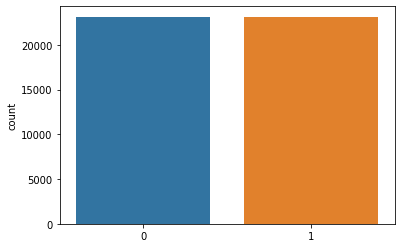

In [182]:
sns.countplot(y_smote)

## Train | Test Split

In [183]:
#spliting data set into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

In [184]:
#looking into independent variable of train dataset
X_train

array([[ 50000,      0,     -1, ...,      0,      1,      0],
       [ 20000,      3,      2, ...,      0,      0,      0],
       [ 10000,      0,      0, ...,      0,      0,      0],
       ...,
       [190000,      0,      0, ...,      0,      0,      0],
       [ 20000,      1,     -1, ...,      0,      0,      0],
       [208912,      0,      1, ...,      0,      0,      0]])

In [185]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Creating Function

In [186]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]


In [187]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))


In [188]:
pip install lime

In [189]:
#  importing lime 
import lime
import lime.lime_tabular

In [190]:
# LIME SECTION

def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  # creating a data frame to store all the independent features
  X=df_final.drop(dependent_var,axis=1)
  # fetching all the features name from independent variable
  feature_names =list(X.columns)

  # setting up the lime tablular 
  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  # showing the lime graph on the screen 
  exp.show_in_notebook(show_table=True)


# creating function to get feature importance 

In [191]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);
   

# Logistic Regression

In [192]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

In [193]:
#creating Instance of Logistic Regression

log_model= LogisticRegression()

In [194]:
#running and evaluating log_model using function ccreated
run_and_evaluate_model(log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 0.0122min 

score matrix for train
********************************************************************************
The accuracy is  0.866994932043308
The precision is  0.9546983468117083
The recall is  0.7699411289391666
The f1 is  0.8524234001086296
the auc  is  0.8667829998218417

confusion_matrix 
  [[16769   633]
 [ 3986 13340]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17402
           1       0.95      0.77      0.85     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8635107118175536
The precision is  0.9536324786324787
The recall is  0.7660487469962238
The f1 is  0.849609746811346
the auc  is  0.8641548082807206

confusion_matrix 
  [[55

### implementing GridSearch for Hyperparameter Tuning

In [195]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [196]:
#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [197]:
#running and evaluating grid_log_model using function ccreated
run_and_evaluate_model(grid_log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    8.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.6s finished


Training time: 0.1649min 

score matrix for train
********************************************************************************
The accuracy is  0.8676860170467634
The precision is  0.9507825224842433
The recall is  0.774904767401593
The f1 is  0.8538811333354532
the auc  is  0.8674834146167831

confusion_matrix 
  [[16707   695]
 [ 3900 13426]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17402
           1       0.95      0.77      0.85     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8641154111955771
The precision is  0.95005291005291
The recall is  0.7705115001716444
The f1 is  0.8509146052506872
the auc  is  0.8647340109553875

confusion_matrix 
  [[551

In [198]:
#getting the coeficient of best estimator
grid_log_model.best_estimator_.coef_

array([[-0.06752441,  0.57740088,  0.11113658,  0.0508938 ,  0.05004064,
         0.04447183,  0.01220693, -0.26911229,  0.04315133,  0.08826837,
         0.05594241, -0.08635213,  0.0328475 , -0.14887266, -0.19522478,
        -0.05216472, -0.0106354 , -0.08725083, -0.05150373, -1.24867128,
        -1.12923808, -1.11780789, -0.88528513, -0.37064689, -1.26317717,
        -1.08466062, -0.22906873, -1.20605866, -1.29049114, -1.26764141,
        -0.99059526, -0.59250537, -0.21066653]])

In [199]:
optimal_log_model=grid_log_model.best_estimator_.coef_

In [200]:
#ccreating dataframe for feature imp
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal_log_model).ravel() })

In [201]:
#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [202]:
imp_feat

Features  Importance
28            age_group_21-30    1.290491
29            age_group_31-40    1.267641
24       EDUCATION_university    1.263177
19                 SEX_Female    1.248671
27            MARRIAGE_single    1.206059
20                   SEX_Male    1.129238
21  EDUCATION_graduate school    1.117808
25           MARRIAGE_married    1.084661
30            age_group_41-50    0.990595
22      EDUCATION_high school    0.885285

==========================Features Importance============================

 [[-0.06752441  0.57740088  0.11113658  0.0508938   0.05004064  0.04447183
   0.01220693 -0.26911229  0.04315133  0.08826837  0.05594241 -0.08635213
   0.0328475  -0.14887266 -0.19522478 -0.05216472 -0.0106354  -0.08725083
  -0.05150373 -1.24867128 -1.12923808 -1.11780789 -0.88528513 -0.37064689
  -1.26317717 -1.08466062 -0.22906873 -1.20605866 -1.29049114 -1.26764141
  -0.99059526 -0.59250537 -0.21066653]]



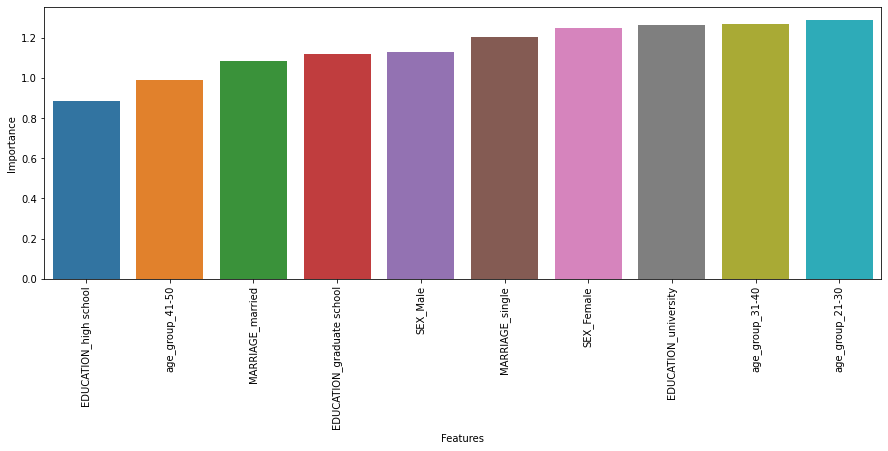

In [203]:
#visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(15,5))
print(f'==========================Features Importance============================\n\n {optimal_log_model}\
\n=========================================================================\n') 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance')
plt.xticks(rotation=90);

In [204]:
#geting the best Paramater of model
grid_log_model.best_params_

{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

# Decision Tree

In [205]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
run_and_evaluate_model(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0095min 

score matrix for train
********************************************************************************
The accuracy is  0.8234565768256162
The precision is  0.8959468062530948
The recall is  0.7310400554080573
The f1 is  0.8051361917172551
the auc  is  0.8232547708370019

confusion_matrix 
  [[15931  1471]
 [ 4660 12666]]

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     17402
           1       0.90      0.73      0.81     17326

    accuracy                           0.82     34728
   macro avg       0.83      0.82      0.82     34728
weighted avg       0.83      0.82      0.82     34728



score matrix for test
********************************************************************************
The accuracy is  0.8234277816171389
The precision is  0.8916735708367854
The recall is  0.738928939237899
The f1 is  0.8081471747700394
the auc  is  0.8239862087493843

confusion_matrix 
  [[5

In [206]:
DecisionTree.feature_importances_

array([0.00216026, 0.22708794, 0.0866535 , 0.        , 0.00213253,
       0.00465897, 0.01667025, 0.        , 0.00422488, 0.        ,
       0.        , 0.00736222, 0.        , 0.00547733, 0.01863266,
       0.00913179, 0.        , 0.        , 0.        , 0.02109678,
       0.12243276, 0.01033673, 0.03496537, 0.01955359, 0.0130354 ,
       0.24816541, 0.05732129, 0.05867957, 0.00864216, 0.00479809,
       0.0124393 , 0.00434123, 0.        ])

==========================Features Importance============================

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  



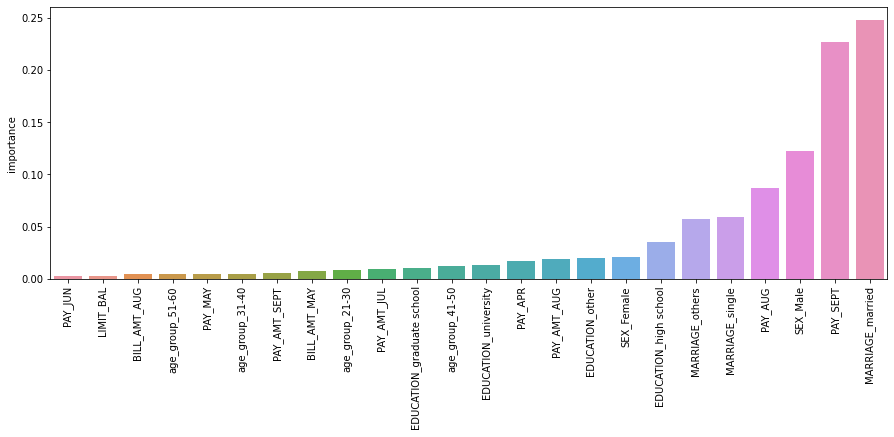

In [207]:
get_features_importance(DecisionTree,X_train)

# Random Forest

In [208]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [209]:
# training and evaluating the Random forest
run_and_evaluate_model(rfc_model,X_train, X_test, y_train, y_test)

Training time: 0.1381min 

score matrix for train
********************************************************************************
The accuracy is  0.9983010826998387
The precision is  0.9987291317659291
The recall is  0.9978644811266305
The f1 is  0.998296619222219
the auc  is  0.9983001293117348

confusion_matrix 
  [[17380    22]
 [   37 17289]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17402
           1       1.00      1.00      1.00     17326

    accuracy                           1.00     34728
   macro avg       1.00      1.00      1.00     34728
weighted avg       1.00      1.00      1.00     34728



score matrix for test
********************************************************************************
The accuracy is  0.8744816862474084
The precision is  0.9021519220158175
The recall is  0.8419155509783728
The f1 is  0.8709935186007279
the auc  is  0.8746969059239691

confusion_matrix 
  [[5

### implementing gridsearch for hyperparameter tuning in Random Forest

In [210]:
# finding the best parameters for rfc_model by gridsearchcv
grid_values = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
grid_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = grid_values, scoring='balanced_accuracy',cv=3,verbose=5,n_jobs=-1)

In [211]:
# training and evaluating the Random forest with hyperparameter tuing
run_and_evaluate_model(grid_rfc_model,X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.6min finished


Training time: 2.7727min 

score matrix for train
********************************************************************************
The accuracy is  0.9461817553559088
The precision is  0.9857942045383117
The recall is  0.9051714186771326
The f1 is  0.943764104107116
the auc  is  0.9460922028450598

confusion_matrix 
  [[17176   226]
 [ 1643 15683]]

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17402
           1       0.99      0.91      0.94     17326

    accuracy                           0.95     34728
   macro avg       0.95      0.95      0.95     34728
weighted avg       0.95      0.95      0.95     34728



score matrix for test
********************************************************************************
The accuracy is  0.8697304768486523
The precision is  0.9017491626349088
The recall is  0.8317885341572262
The f1 is  0.8653571428571429
the auc  is  0.8699812236003522

confusion_matrix 
  [[5

In [212]:
#getting the best paramater of random forest
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}

In [213]:
#getting the best estimator for random forest
grid_rfc_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
#storing best estimator in varibale
optimal__rfc_model=grid_rfc_model.best_estimator_

==========================Features Importance============================

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)  



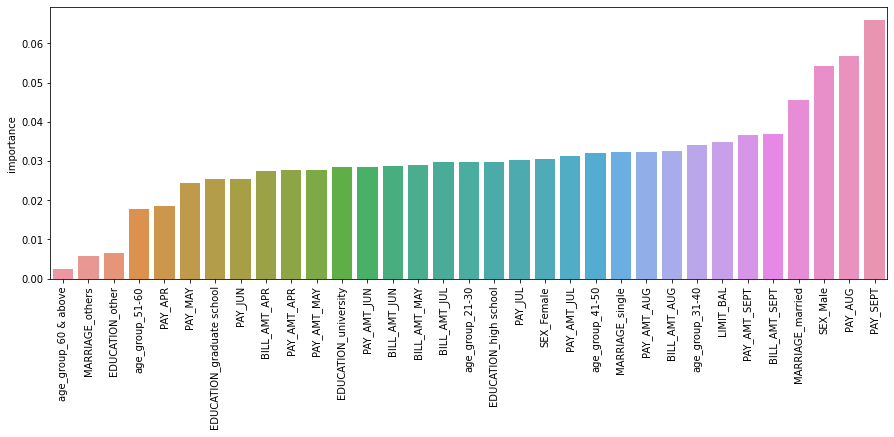

In [215]:
#visualizing the feature importance of variable for random forest
get_features_importance(optimal__rfc_model,X_train)

# Support Vector Machine

In [216]:
#importing SVM
from sklearn.svm import SVC
svc_model=SVC()

In [217]:
# training and evaluating the SVC model 
run_and_evaluate_model(svc_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 1.2541min 

score matrix for train
********************************************************************************
The accuracy is  0.8759502418797512
The precision is  0.9449685534591195
The recall is  0.7978183077455847
The f1 is  0.8651811979720849
the auc  is  0.8757796285308778

confusion_matrix 
  [[16597   805]
 [ 3503 13823]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     17402
           1       0.94      0.80      0.87     17326

    accuracy                           0.88     34728
   macro avg       0.89      0.88      0.88     34728
weighted avg       0.89      0.88      0.88     34728



score matrix for test
********************************************************************************
The accuracy is  0.869039391845197
The precision is  0.9430509868421053
The recall is  0.7873326467559217
The f1 is  0.8581852198316183
the auc  is  0.8695793668562217

confusion_matrix 
  [[5

### Hyperparameter tuning for SVM

In [218]:
params={'C':[0.1,1,10],'kernel':['rbf']}
svc_grid_model= GridSearchCV(svc_model,param_grid=params,scoring='recall')

In [219]:
run_and_evaluate_model(svc_grid_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 14.5978min 

score matrix for train
********************************************************************************
The accuracy is  0.8910965215388159
The precision is  0.9526737967914438
The recall is  0.8225787833314094
The f1 is  0.882859443721737
the auc  is  0.8909469022966667

confusion_matrix 
  [[16694   708]
 [ 3074 14252]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     17402
           1       0.95      0.82      0.88     17326

    accuracy                           0.89     34728
   macro avg       0.90      0.89      0.89     34728
weighted avg       0.90      0.89      0.89     34728



score matrix for test
********************************************************************************
The accuracy is  0.8684346924671734
The precision is  0.9310759366860348
The recall is  0.7976313079299691
The f1 is  0.8592031062216879
the auc  is  0.8689026104867237

confusion_matrix 
  [[

In [220]:
#getting the best estimator
svc_grid_model.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [221]:
#getting the best parameter
svc_grid_model.best_params_

{'C': 10, 'kernel': 'rbf'}

---
#XGboost
---

In [222]:
from xgboost import XGBClassifier

In [223]:
# creating XGBRegressor model
xgboost_model=XGBClassifier()

In [224]:
# training and evaluating the Xgboost model
run_and_evaluate_model(xgboost_model,X_train,X_test,y_train,y_test)

Training time: 0.0748min 

score matrix for train
********************************************************************************
The accuracy is  0.8728979497811564
The precision is  0.926984126984127
The recall is  0.8089576359228905
The f1 is  0.8639585773284844
the auc  is  0.8727583260639622

confusion_matrix 
  [[16298  1104]
 [ 3310 14016]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     17402
           1       0.93      0.81      0.86     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8673116793365584
The precision is  0.921249018067557
The recall is  0.8051836594576038
The f1 is  0.859314892837516
the auc  is  0.8677222645114105

confusion_matrix 
  [[534

### Hyperparameter tuning for Xgboost

In [225]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_xgboost_model=GridSearchCV(estimator=xgboost_model,param_grid=params,cv=5,scoring='recall',verbose=5,n_jobs=-1)

In [226]:
# training and evaluating the xgb_grid
run_and_evaluate_model(grid_xgboost_model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.3min finished


Training time: 4.7032min 

score matrix for train
********************************************************************************
The accuracy is  0.9509329647546648
The precision is  0.9913196628506731
The recall is  0.9096156066027935
The f1 is  0.948711774620756
the auc  is  0.9508427418142114

confusion_matrix 
  [[17264   138]
 [ 1566 15760]]

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     17402
           1       0.99      0.91      0.95     17326

    accuracy                           0.95     34728
   macro avg       0.95      0.95      0.95     34728
weighted avg       0.95      0.95      0.95     34728



score matrix for test
********************************************************************************
The accuracy is  0.8751727712508639
The precision is  0.9250921793130216
The recall is  0.8182286302780638
The f1 is  0.8683850988250295
the auc  is  0.8755490977477276

confusion_matrix 
  [[5

In [227]:
#getting the best estimator
grid_xgboost_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [228]:
optimal_xgboost_model=grid_xgboost_model.best_estimator_

==========================Features Importance============================

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)  



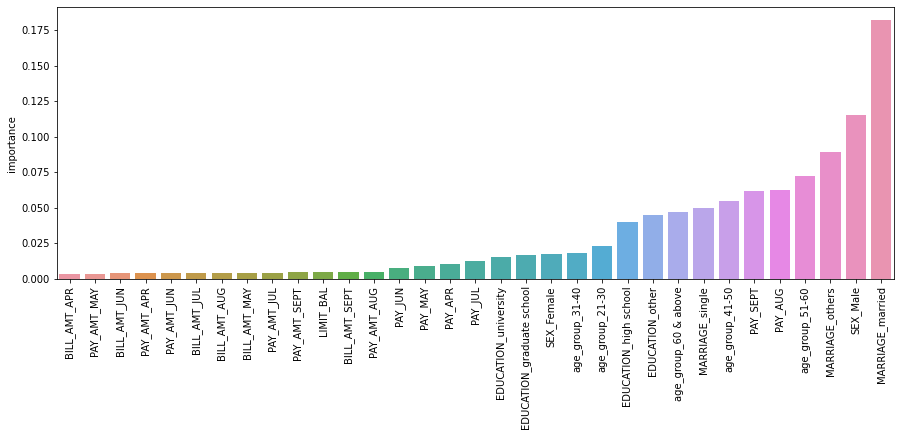

In [229]:
#visaulizing feature importance
get_features_importance(optimal_xgboost_model,X_train)

---
# CatBoost
---

In [230]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 22 kB/s 


In [231]:
from catboost import CatBoostClassifier

In [232]:
cb_model=CatBoostClassifier(verbose=0)

In [233]:
cb_model=CatBoostClassifier()

In [234]:
# training and evaluating the cb model
run_and_evaluate_model(cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.04686
0:	learn: 0.6674200	total: 61ms	remaining: 1m
1:	learn: 0.6291472	total: 73.7ms	remaining: 36.8s
2:	learn: 0.6017456	total: 85.6ms	remaining: 28.5s
3:	learn: 0.5782334	total: 97.7ms	remaining: 24.3s
4:	learn: 0.5616089	total: 110ms	remaining: 21.9s
5:	learn: 0.5480126	total: 123ms	remaining: 20.4s
6:	learn: 0.5303774	total: 138ms	remaining: 19.6s
7:	learn: 0.5123227	total: 153ms	remaining: 18.9s
8:	learn: 0.4907344	total: 165ms	remaining: 18.1s
9:	learn: 0.4850207	total: 177ms	remaining: 17.5s
10:	learn: 0.4726643	total: 194ms	remaining: 17.4s
11:	learn: 0.4648171	total: 207ms	remaining: 17.1s
12:	learn: 0.4548068	total: 219ms	remaining: 16.7s
13:	learn: 0.4510864	total: 232ms	remaining: 16.4s
14:	learn: 0.4457322	total: 245ms	remaining: 16.1s
15:	learn: 0.4397822	total: 257ms	remaining: 15.8s
16:	learn: 0.4317269	total: 272ms	remaining: 15.7s
17:	learn: 0.4225758	total: 285ms	remaining: 15.5s
18:	learn: 0.4187535	total: 298ms	remaining: 15.4s
19:	learn: 0.

### Hyperparameter tuning for Catboost

In [235]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_cb_model=GridSearchCV(estimator=cb_model,param_grid=params,cv=3,scoring='recall',verbose=0,n_jobs=-1)

In [236]:
# training and evaluating the catboost model with hyperparameter tuing
run_and_evaluate_model(grid_cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.387083
0:	learn: 0.4900353	total: 44.2ms	remaining: 4.38s
1:	learn: 0.4021879	total: 78.8ms	remaining: 3.86s
2:	learn: 0.3562818	total: 114ms	remaining: 3.68s
3:	learn: 0.3355857	total: 149ms	remaining: 3.58s
4:	learn: 0.3271613	total: 185ms	remaining: 3.52s
5:	learn: 0.3204853	total: 224ms	remaining: 3.51s
6:	learn: 0.3162770	total: 263ms	remaining: 3.49s
7:	learn: 0.3027940	total: 297ms	remaining: 3.41s
8:	learn: 0.3000949	total: 332ms	remaining: 3.36s
9:	learn: 0.2979053	total: 366ms	remaining: 3.29s
10:	learn: 0.2949937	total: 400ms	remaining: 3.23s
11:	learn: 0.2924695	total: 439ms	remaining: 3.22s
12:	learn: 0.2900498	total: 474ms	remaining: 3.17s
13:	learn: 0.2873761	total: 509ms	remaining: 3.13s
14:	learn: 0.2855867	total: 546ms	remaining: 3.09s
15:	learn: 0.2840783	total: 579ms	remaining: 3.04s
16:	learn: 0.2822906	total: 626ms	remaining: 3.06s
17:	learn: 0.2794962	total: 669ms	remaining: 3.05s
18:	learn: 0.2774462	total: 703ms	remaining: 3s
19:	learn: 0

In [237]:
#getting the best estimator
optimal_catboost_model=grid_cb_model.best_estimator_

In [238]:
#getting the featre importance
grid_cb_model.best_estimator_.feature_importances_

array([ 2.64138814,  2.35003258,  1.21902964,  0.43582874,  1.1111946 ,
        0.38161136,  0.57591736,  1.90319351,  1.01515305,  0.99850993,
        1.14142939,  0.93673936,  1.26492435,  1.98951919,  1.79909839,
        1.79595595,  1.54127479,  1.81281601,  2.24887909,  7.77945506,
        6.76668767, 10.58003974,  8.27691533,  1.55869769, 12.72015505,
        6.26634283,  0.68935285,  7.16075507,  3.50240493,  3.68168983,
        2.53836732,  1.18731137,  0.12932981])

==========================Features Importance============================




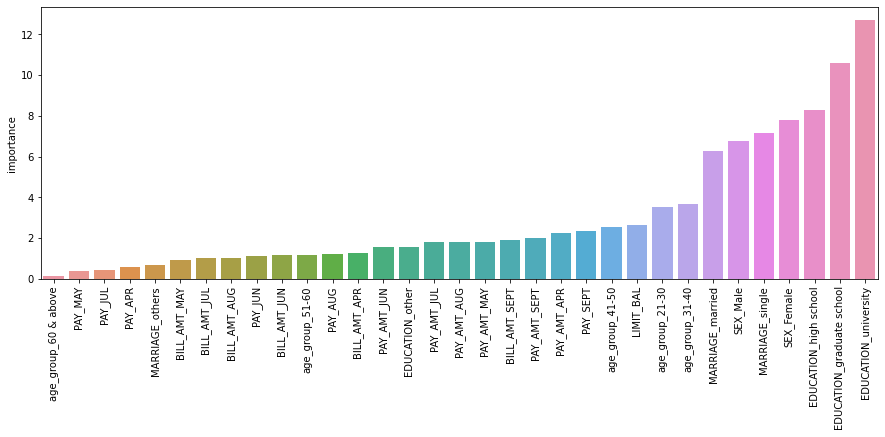

In [239]:
# visualizing feature importance
get_features_importance(optimal_catboost_model,X_train)

In [240]:
grid_cb_model.best_params_

{'max_depth': 9, 'n_estimators': 100}

---
# LightGBM
---

In [241]:
import lightgbm as lgb

In [242]:
lgbc=lgb.LGBMClassifier()

In [243]:
# training and evaluating the lgbr_grid
run_and_evaluate_model(lgbc,X_train,X_test,y_train,y_test)

Training time: 0.0188min 

score matrix for train
********************************************************************************
The accuracy is  0.8891096521538816
The precision is  0.9466357308584686
The recall is  0.8241948516680134
The f1 is  0.8811823146462621
the auc  is  0.8889679004920921

confusion_matrix 
  [[16597   805]
 [ 3046 14280]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.95      0.90     17402
           1       0.95      0.82      0.88     17326

    accuracy                           0.89     34728
   macro avg       0.90      0.89      0.89     34728
weighted avg       0.90      0.89      0.89     34728



score matrix for test
********************************************************************************
The accuracy is  0.8764685556323428
The precision is  0.932336742722266
The recall is  0.8135942327497425
The f1 is  0.8689275893675528
the auc  is  0.8768840728966104

confusion_matrix 
  [[5

In [244]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [245]:
# training and evaluating the lgbr_grid
run_and_evaluate_model(lgbc_grid,X_train,X_test,y_train,y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   21.7s finished


Training time: 0.3884min 

score matrix for train
********************************************************************************
The accuracy is  0.8978921907394609
The precision is  0.9558687309779013
The recall is  0.8338335449613298
The f1 is  0.8906905055487052
the auc  is  0.8977523086259355

confusion_matrix 
  [[16735   667]
 [ 2879 14447]]

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     17402
           1       0.96      0.83      0.89     17326

    accuracy                           0.90     34728
   macro avg       0.90      0.90      0.90     34728
weighted avg       0.90      0.90      0.90     34728



score matrix for test
********************************************************************************
The accuracy is  0.8773324118866621
The precision is  0.9333202202989772
The recall is  0.8144524545142465
The f1 is  0.8698441796516956
the auc  is  0.8777479663875579

confusion_matrix 
  [[

==========================Features Importance============================

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)  



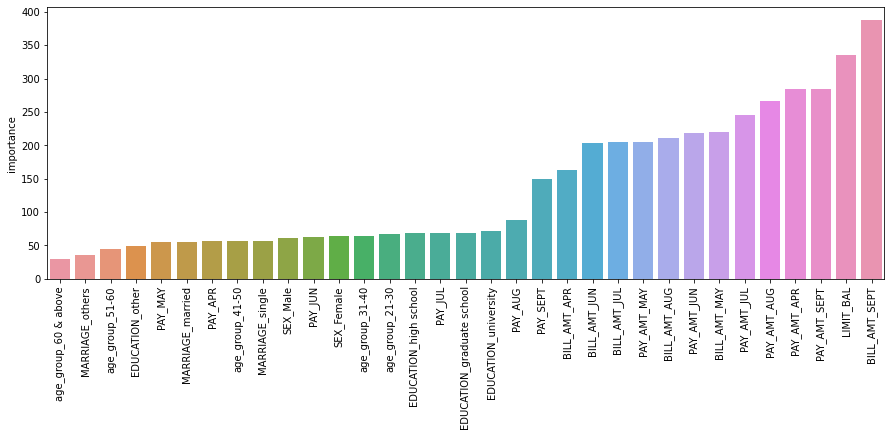

In [246]:
get_features_importance(lgbc_grid.best_estimator_,X_train)

# Model's Score matrix

In [247]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [248]:
# list of all models
model_name=['Logestic Regrestion','grid_log_regg','Desision Tree','Random forest','grid random forest','SVM','Grid SVM','XGboost','Grid Xgboost','CATBoost','Grid Catboost','LightGBM','Grid LightGBM']

In [249]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [250]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [251]:
matrix_df

Models  accuracy  precision    recall        f1   roc_auc
0   Logestic Regrestion  0.863511   0.953632  0.766049  0.849610  0.864155
1         grid_log_regg  0.864115   0.950053  0.770512  0.850915  0.864734
2         Desision Tree  0.823428   0.891674  0.738929  0.808147  0.823986
3         Random forest  0.874482   0.902152  0.841916  0.870994  0.874697
4    grid random forest  0.869730   0.901749  0.831789  0.865357  0.869981
5                   SVM  0.869039   0.943051  0.787333  0.858185  0.869579
6              Grid SVM  0.868435   0.931076  0.797631  0.859203  0.868903
7               XGboost  0.867312   0.921249  0.805184  0.859315  0.867722
8          Grid Xgboost  0.875173   0.925092  0.818229  0.868385  0.875549
9              CATBoost  0.872927   0.926877  0.811535  0.865379  0.873332
10        Grid Catboost  0.869039   0.912519  0.818229  0.862805  0.869375
11             LightGBM  0.876469   0.932337  0.813594  0.868928  0.876884
12        Grid LightGBM  0.877332   0.933320  0.814452  0.869844  0.877748

# LIME
---

In [252]:
LimeTabularExplainer_table(grid_rfc_model.best_estimator_,instance=2,num_features=5,dependent_var='Defaulters')

In [253]:
LimeTabularExplainer_table(grid_xgboost_model.best_estimator_,instance=2,num_features=5,dependent_var='Defaulters')

# ROC curve for all the models
---

In [259]:
log_reg_best=grid_log_model.best_estimator_
rfc_best=grid_rfc_model.best_estimator_
xgbc_best=grid_xgboost_model.best_estimator_
cat_best=grid_cb_model.best_estimator_
lgbc_best=lgbc_grid.best_estimator_



In [260]:
y_preds_proba_lr = log_reg_best.predict_proba(scaled_X_test)[::,1]
y_preds_proba_dt = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_cat = cat_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]


In [261]:
from sklearn.metrics import roc_curve

In [262]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr), 
                    (DecisionTree, y_preds_proba_dt), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (cat_best, y_preds_proba_cat),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

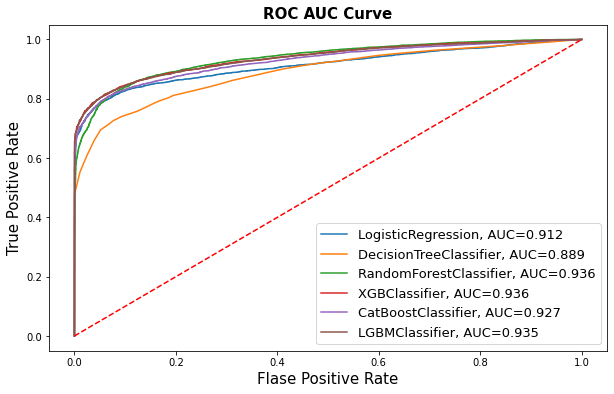

In [263]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()